🔍 Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   subject_id            140 non-null    int64         
 1   hadm_id               140 non-null    int64         
 2   stay_id               140 non-null    int64         
 3   gender                140 non-null    object        
 4   anchor_age            140 non-null    int64         
 5   race                  140 non-null    object        
 6   insurance             140 non-null    object        
 7   admittime             140 non-null    datetime64[ns]
 8   dischtime             140 non-null    datetime64[ns]
 9   intime                140 non-null    datetime64[ns]
 10  outtime               140 non-null    datetime64[ns]
 11  los                   140 non-null    float64       
 12  hospital_expire_flag  140 non-null    int64         
 13  d

C:\Users\quelx\AppData\Local\Temp\ipykernel_13332\3896059540.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mortality_counts.index, y=mortality_counts.values, palette='coolwarm')


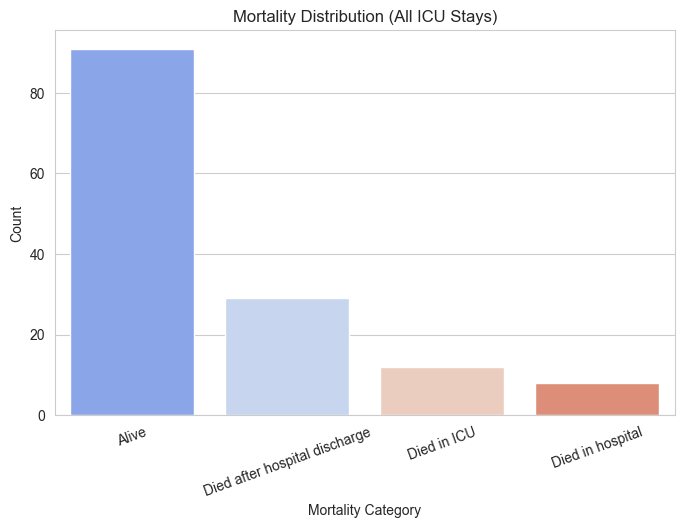

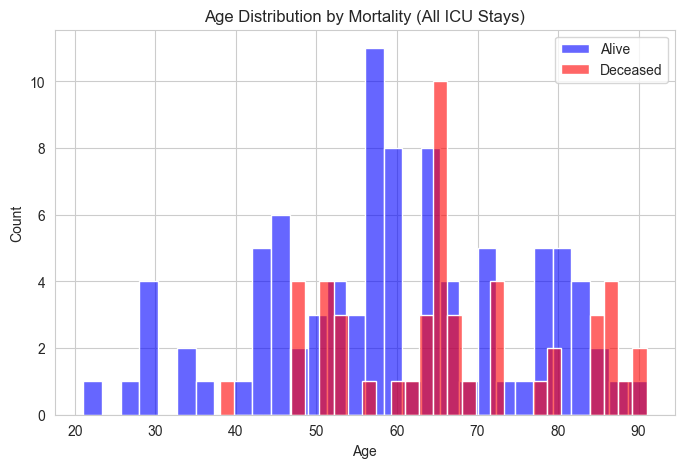

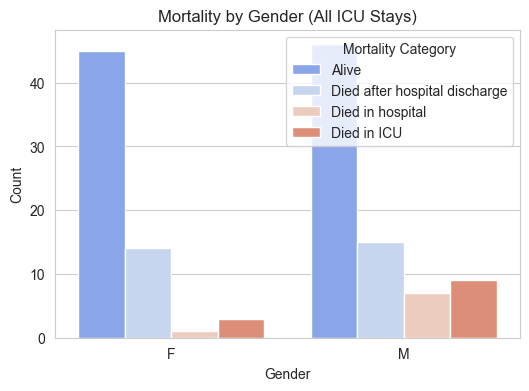

C:\Users\quelx\AppData\Local\Temp\ipykernel_13332\3896059540.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='mortality_category', y='los', data=df, palette='coolwarm')


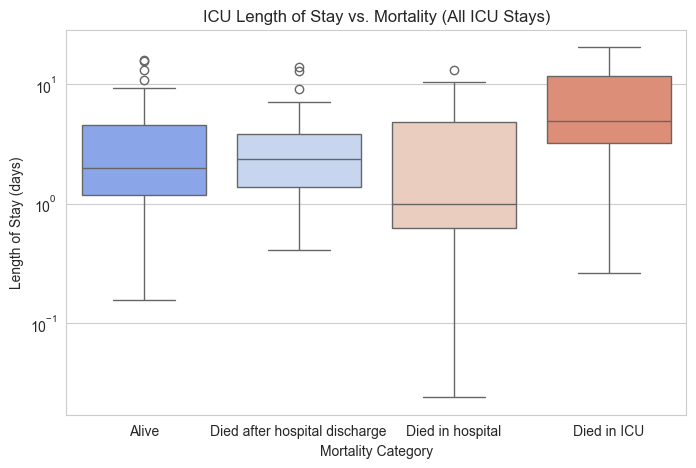

✅ Mortality analysis for all ICU stays completed! Next: Analyzing last ICU stay per patient.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set visualization style
sns.set_style("whitegrid")

# Load processed dataset
processed_path = "../data/processed/icu_admissions_processed.csv"
df = pd.read_csv(processed_path)

# Convert date columns to datetime
date_cols = ['admittime', 'dischtime', 'intime', 'outtime', 'deathtime', 'dod']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# 🔍 Dataset Overview
print("🔍 Dataset Overview")
print(df.info())
print(df.head())

# 🩸 Mortality Category Distribution
print("\n🩸 Mortality Category Distribution")
mortality_counts = df['mortality_category'].value_counts()
print(mortality_counts)

# 📊 Plot mortality distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=mortality_counts.index, y=mortality_counts.values, palette='coolwarm')
plt.xlabel("Mortality Category")
plt.ylabel("Count")
plt.title("Mortality Distribution (All ICU Stays)")
plt.xticks(rotation=20)
plt.show()

# 📊 Mortality by Age
plt.figure(figsize=(8, 5))
sns.histplot(df[df['mortality_category'] == 'Alive']['anchor_age'], bins=30, color='blue', label='Alive', alpha=0.6)
sns.histplot(df[df['mortality_category'] != 'Alive']['anchor_age'], bins=30, color='red', label='Deceased', alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution by Mortality (All ICU Stays)")
plt.legend()
plt.show()

# 📊 Mortality by Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='mortality_category', data=df, palette='coolwarm')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Mortality by Gender (All ICU Stays)")
plt.legend(title="Mortality Category")
plt.show()

# 📊 Mortality by ICU Length of Stay
plt.figure(figsize=(8, 5))
sns.boxplot(x='mortality_category', y='los', data=df, palette='coolwarm')
plt.xlabel("Mortality Category")
plt.ylabel("Length of Stay (days)")
plt.title("ICU Length of Stay vs. Mortality (All ICU Stays)")
plt.yscale("log")  # Log scale to handle outliers
plt.show()

print("✅ Mortality analysis for all ICU stays completed! Next: Analyzing last ICU stay per patient.")


🔍 Dataset Overview - Last ICU Stay per Patient
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   subject_id            100 non-null    int64         
 1   hadm_id               100 non-null    int64         
 2   stay_id               100 non-null    int64         
 3   gender                100 non-null    object        
 4   anchor_age            100 non-null    int64         
 5   race                  100 non-null    object        
 6   insurance             100 non-null    object        
 7   admittime             100 non-null    datetime64[ns]
 8   dischtime             100 non-null    datetime64[ns]
 9   intime                100 non-null    datetime64[ns]
 10  outtime               100 non-null    datetime64[ns]
 11  los                   100 non-null    float64       
 12  hospital_expire_flag  100 non-nu

C:\Users\quelx\AppData\Local\Temp\ipykernel_13332\1804598519.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mortality_counts_last.index, y=mortality_counts_last.values, palette='coolwarm')


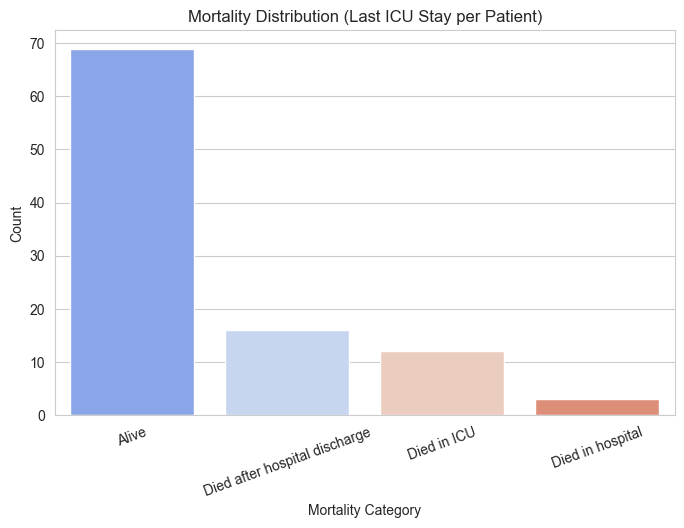

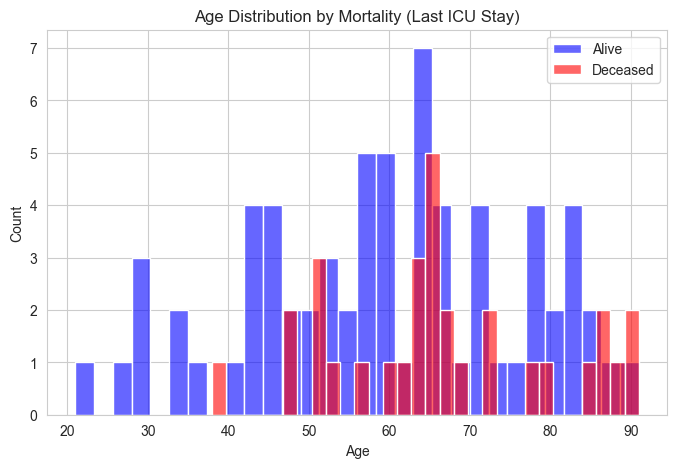

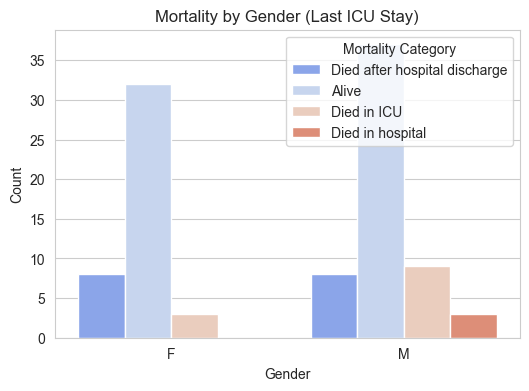

C:\Users\quelx\AppData\Local\Temp\ipykernel_13332\1804598519.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='mortality_category', y='los', data=df_last_stay, palette='coolwarm')


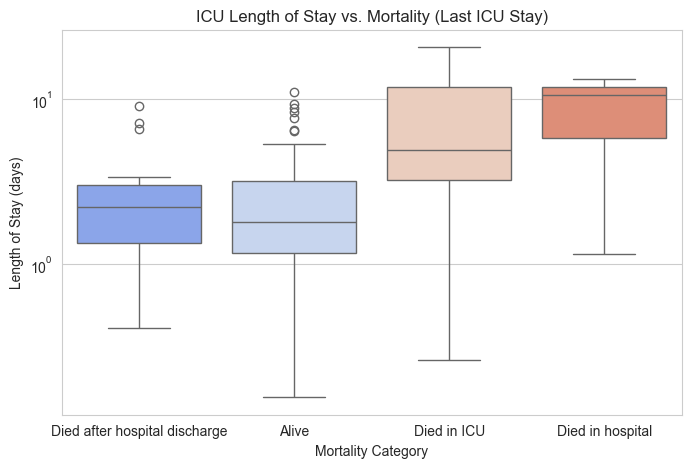

✅ Mortality analysis for last ICU stay per patient completed! Next: Comparing both analyses.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")

# Load processed dataset
processed_path = "../data/processed/icu_admissions_processed.csv"
df = pd.read_csv(processed_path)

# Convert date columns to datetime
date_cols = ['admittime', 'dischtime', 'intime', 'outtime', 'deathtime', 'dod']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# 📌 Keep only the last ICU stay per patient
df_last_stay = df.sort_values(by=['subject_id', 'outtime']).groupby('subject_id').last().reset_index()

# 🔍 Dataset Overview (Last ICU Stay)
print("🔍 Dataset Overview - Last ICU Stay per Patient")
print(df_last_stay.info())
print(df_last_stay.head())

# 🩸 Mortality Category Distribution (Last ICU Stay)
print("\n🩸 Mortality Category Distribution - Last ICU Stay per Patient")
mortality_counts_last = df_last_stay['mortality_category'].value_counts()
print(mortality_counts_last)

# 📊 Plot mortality distribution (Last ICU Stay)
plt.figure(figsize=(8, 5))
sns.barplot(x=mortality_counts_last.index, y=mortality_counts_last.values, palette='coolwarm')
plt.xlabel("Mortality Category")
plt.ylabel("Count")
plt.title("Mortality Distribution (Last ICU Stay per Patient)")
plt.xticks(rotation=20)
plt.show()

# 📊 Mortality by Age (Last ICU Stay)
plt.figure(figsize=(8, 5))
sns.histplot(df_last_stay[df_last_stay['mortality_category'] == 'Alive']['anchor_age'], bins=30, color='blue', label='Alive', alpha=0.6)
sns.histplot(df_last_stay[df_last_stay['mortality_category'] != 'Alive']['anchor_age'], bins=30, color='red', label='Deceased', alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution by Mortality (Last ICU Stay)")
plt.legend()
plt.show()

# 📊 Mortality by Gender (Last ICU Stay)
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='mortality_category', data=df_last_stay, palette='coolwarm')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Mortality by Gender (Last ICU Stay)")
plt.legend(title="Mortality Category")
plt.show()

# 📊 Mortality by ICU Length of Stay (Last ICU Stay)
plt.figure(figsize=(8, 5))
sns.boxplot(x='mortality_category', y='los', data=df_last_stay, palette='coolwarm')
plt.xlabel("Mortality Category")
plt.ylabel("Length of Stay (days)")
plt.title("ICU Length of Stay vs. Mortality (Last ICU Stay)")
plt.yscale("log")  # Log scale to handle outliers
plt.show()

print("✅ Mortality analysis for last ICU stay per patient completed! Next: Comparing both analyses.")


In [ ]:
import pandas as pd

# Load processed dataset
processed_path = "../data/processed/icu_admissions_processed.csv"
df = pd.read_csv(processed_path)

# Convert date columns to datetime
df['outtime'] = pd.to_datetime(df['outtime'], errors='coerce')

# Get last ICU stay per patient
df_last_stay = df.sort_values(by=['subject_id', 'outtime']).groupby('subject_id').last().reset_index()

# Compare mortality distributions
mortality_counts_all = df['mortality_category'].value_counts().rename("All ICU Stays")
mortality_counts_last = df_last_stay['mortality_category'].value_counts().rename("Last ICU Stay per Patient")

# Combine into one table
comparison_df = pd.concat([mortality_counts_all, mortality_counts_last], axis=1)
print("\n📊 Mortality Comparison (All ICU Stays vs. Last ICU Stay per Patient)")
print(comparison_df)
